In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pre_process import pre_processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

In [8]:
sequence_length = 30
X, y = pre_processing('Result_5m_1.csv','with_Indicator_5m_BTC_USDT.csv', sequence_length)

In [9]:
X.shape

(12251, 150)

In [10]:
y_cat = to_categorical(y, num_classes=3)

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy

# Model output layer for 3 classes
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    BatchNormalization(),  # Normalize after first Dense
    Dropout(0.3),  # Dropout for regularization
    
    Dense(256, activation='relu'),
    BatchNormalization(),  # Normalize after second Dense
    Dropout(0.3),
    
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile with sparse categorical crossentropy
model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])

# Train the model
history = model.fit(X, y_cat, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/50
307/307 [==============================] - 8s 16ms/step - loss: 1.1137 - accuracy: 0.5285 - val_loss: 0.7774 - val_accuracy: 0.6977
Epoch 2/50
307/307 [==============================] - 4s 14ms/step - loss: 0.8339 - accuracy: 0.6849 - val_loss: 0.7575 - val_accuracy: 0.6977
Epoch 3/50
307/307 [==============================] - 4s 14ms/step - loss: 0.7853 - accuracy: 0.7122 - val_loss: 0.7616 - val_accuracy: 0.6977
Epoch 4/50
307/307 [==============================] - 5s 17ms/step - loss: 0.7733 - accuracy: 0.7168 - val_loss: 0.7479 - val_accuracy: 0.6977
Epoch 5/50
307/307 [==============================] - 5s 15ms/step - loss: 0.7624 - accuracy: 0.7186 - val_loss: 0.7493 - val_accuracy: 0.6977
Epoch 6/50
307/307 [==============================] - 5s 15ms/step - loss: 0.7558 - accuracy: 0.7192 - val_loss: 0.7502 - val_accuracy: 0.6977
Epoch 7/50
307/307 [==============================] - 5s 15ms/step - loss: 0.7546 - accuracy: 0.7190 - val_loss: 0.7500 - val_accuracy: 0.6977

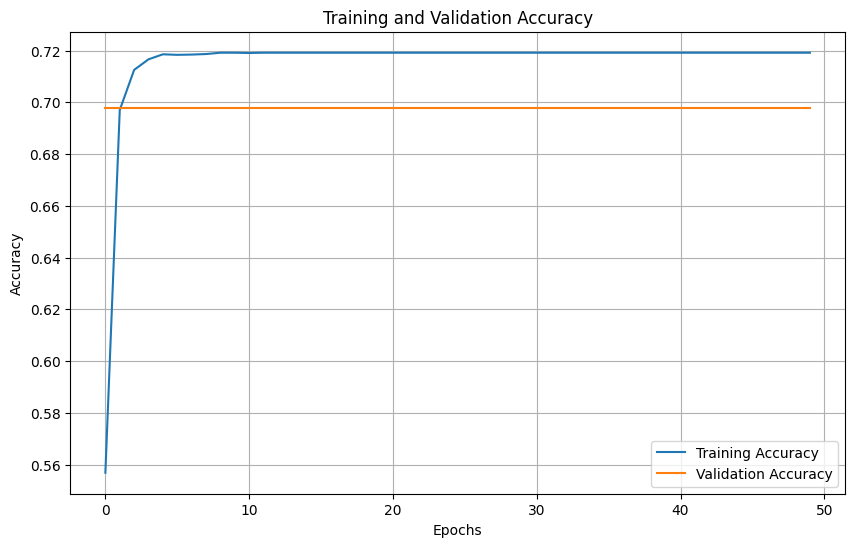

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()